In [3]:
import torch
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [16]:
class LogisticModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LogisticModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
        
    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out

In [17]:
model = LogisticModel(1,1)
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_function = nn.BCELoss()

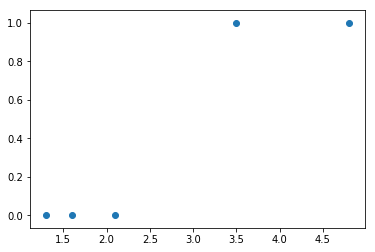

In [18]:
x_train = torch.tensor([[1.6],[2.1],[1.3],[4.8],[3.5]], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([[0],[0],[0],[1],[1]], dtype=torch.float).reshape(-1,1)
plt.scatter(x_train.numpy(), y_train.numpy())
plt.show()

In [19]:
epochs = 1000
for epoch in range(epochs):
    out = model(x_train)
    optimizer.zero_grad()
    loss = loss_function(out, y_train)
    loss.backward()
    optimizer.step()
    predicted = model.forward(x_train)
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.766960859298706
epoch 1, loss 1.742779016494751
epoch 2, loss 1.718747854232788
epoch 3, loss 1.6948721408843994
epoch 4, loss 1.671156644821167
epoch 5, loss 1.6476058959960938
epoch 6, loss 1.6242250204086304
epoch 7, loss 1.6010191440582275
epoch 8, loss 1.5779931545257568
epoch 9, loss 1.5551526546478271
epoch 10, loss 1.5325028896331787
epoch 11, loss 1.5100492238998413
epoch 12, loss 1.4877978563308716
epoch 13, loss 1.4657537937164307
epoch 14, loss 1.4439232349395752
epoch 15, loss 1.4223120212554932
epoch 16, loss 1.4009262323379517
epoch 17, loss 1.3797719478607178
epoch 18, loss 1.3588550090789795
epoch 19, loss 1.338181734085083
epoch 20, loss 1.317758321762085
epoch 21, loss 1.297591209411621
epoch 22, loss 1.277686357498169
epoch 23, loss 1.2580499649047852
epoch 24, loss 1.2386882305145264
epoch 25, loss 1.2196074724197388
epoch 26, loss 1.2008135318756104
epoch 27, loss 1.1823123693466187
epoch 28, loss 1.1641098260879517
epoch 29, loss 1.146211624145507

epoch 420, loss 0.5049993395805359
epoch 421, loss 0.50477135181427
epoch 422, loss 0.5045434832572937
epoch 423, loss 0.5043159127235413
epoch 424, loss 0.5040884017944336
epoch 425, loss 0.5038611888885498
epoch 426, loss 0.5036340951919556
epoch 427, loss 0.5034071803092957
epoch 428, loss 0.5031805038452148
epoch 429, loss 0.5029539465904236
epoch 430, loss 0.5027276277542114
epoch 431, loss 0.5025014877319336
epoch 432, loss 0.5022755265235901
epoch 433, loss 0.5020497441291809
epoch 434, loss 0.501824140548706
epoch 435, loss 0.5015987157821655
epoch 436, loss 0.5013734698295593
epoch 437, loss 0.5011484026908875
epoch 438, loss 0.5009235739707947
epoch 439, loss 0.5006988644599915
epoch 440, loss 0.5004743933677673
epoch 441, loss 0.5002500414848328
epoch 442, loss 0.5000259876251221
epoch 443, loss 0.49980196356773376
epoch 444, loss 0.49957823753356934
epoch 445, loss 0.49935466051101685
epoch 446, loss 0.4991312623023987
epoch 447, loss 0.49890798330307007
epoch 448, loss 0.4

epoch 845, loss 0.42275866866111755
epoch 846, loss 0.42259520292282104
epoch 847, loss 0.422432005405426
epoch 848, loss 0.422268807888031
epoch 849, loss 0.4221057891845703
epoch 850, loss 0.4219428598880768
epoch 851, loss 0.4217800199985504
epoch 852, loss 0.42161741852760315
epoch 853, loss 0.42145484685897827
epoch 854, loss 0.4212924838066101
epoch 855, loss 0.4211301803588867
epoch 856, loss 0.4209679663181305
epoch 857, loss 0.4208059310913086
epoch 858, loss 0.42064395546913147
epoch 859, loss 0.42048215866088867
epoch 860, loss 0.42032042145729065
epoch 861, loss 0.42015886306762695
epoch 862, loss 0.4199974536895752
epoch 863, loss 0.4198361039161682
epoch 864, loss 0.4196748733520508
epoch 865, loss 0.4195137917995453
epoch 866, loss 0.41935282945632935
epoch 867, loss 0.41919198632240295
epoch 868, loss 0.4190312325954437
epoch 869, loss 0.41887062788009644
epoch 870, loss 0.4187101423740387
epoch 871, loss 0.41854971647262573
epoch 872, loss 0.4183894991874695
epoch 873,

In [20]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.6596]])), ('linear.bias', tensor([-1.6566]))])


In [21]:
torch.save(model.state_dict(), 'logisticmodel.pkl')
model.load_state_dict(torch.load('logisticmodel.pkl'))

In [22]:
test=torch.tensor([[0.1],[1.5],[2.3],[3.0],[6.4]])
results = model.forward(test)
for result in results:
    if result <= 0.5:
        print(result,'false')
    else: print(result, 'true')

tensor([0.1693], grad_fn=<SelectBackward>) false
tensor([0.3391], grad_fn=<SelectBackward>) false
tensor([0.4652], grad_fn=<SelectBackward>) false
tensor([0.5799], grad_fn=<SelectBackward>) true
tensor([0.9286], grad_fn=<SelectBackward>) true
